## Objective: To determine whether a person makes over 50K a year

### 1. Set up environment and import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/adult.data',header=None)

In [3]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'income']

In [4]:
df.columns = cols

In [5]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 2. Exploratory Data Analysis
In this section, the followings will be done:
- Looking for missing values
- Distribution of income class

#### Looking for missing values

In [6]:
for i in df.columns[1:]:
    print(df[i].value_counts())
    print('\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8     

In [7]:
# Looking for missing values/ irrelevant values on each columns
for i in df.columns[1:]:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == ' ?':
            print (t[' ?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in workclass
1836
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education_num
0
The Value Counts of ? in marital_status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital_gain
0
The Value Counts of ? in capital_loss
0
The Value Counts of ? in hours_per_week
0
The Value Counts of ? in native_country
583
The Value Counts of ? in income
0


We can see in columns: workclass, occupation, native_country have data input as ' ?', we convert them to Nan values

In [8]:
# Converting all ' ?' to NAN
df[df == ' ?'] = np.nan

In [9]:
# Look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Dealing with na values, we can use different approaches:
- Approach 1: Drop all na values 2399 data in total (7% data loss) (Data Size)
- Approach 2: Convert all na values to mode number which may affect the accuracy of prediction (Inaccuracy)

In the trade-off, I decide to use approach 1

In [10]:
# Removing all nan values 
df.dropna(inplace=True)

In [11]:
# Re-confirm if no missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
# Normally, the common age of adult is >=18, we consider those below 18 as outlier
# Ignore data below 18
df = df.loc[df['age']>=18]
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
# Reset the index of each row of data
df.reset_index(inplace=True,drop=True)

In [14]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
29830,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
29831,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
29832,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


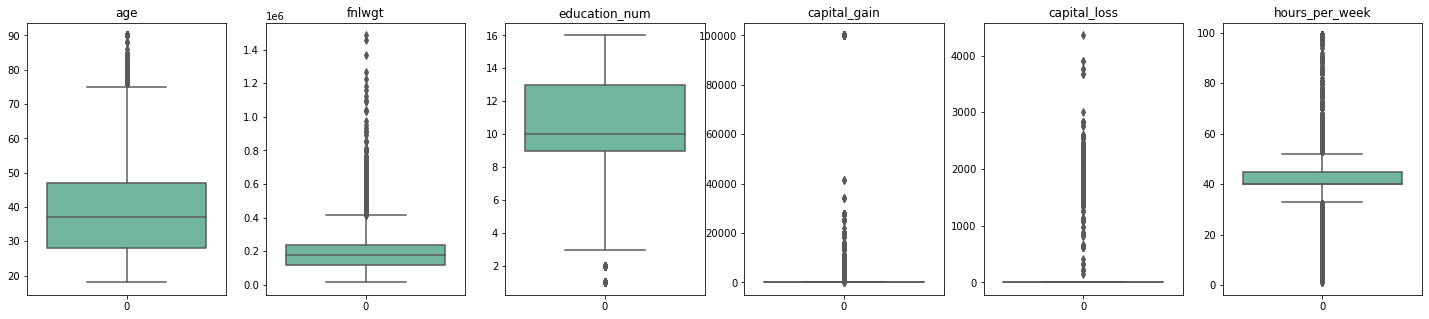

In [15]:
num_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
fig, axes = plt.subplots(1,6,figsize=(25,5))
for i in num_features:
    sns.boxplot(ax=axes[num_features.index(i)],data=df[i],palette='Set2').set_title(i)

#### Distribution of income class

([<matplotlib.patches.Wedge at 0x1efc59c3970>,
 [Text(-0.7737526243986884, 0.7818611617391815, ' <=50K'),
  Text(0.7737526976018102, -0.7818610892952289, ' >50K')],
 [Text(-0.42204688603564816, 0.42646972458500804, '74.8%'),
  Text(0.4220469259646237, -0.4264696850701248, '25.2%')])

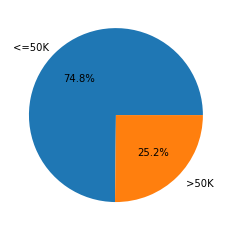

In [16]:
plt.pie(df['income'].value_counts(),labels=df['income'].unique(),autopct='%1.1f%%')

From the pie chart above, the ratio of income class (<=50k / >50k) is nearly 3:1, if we use the data for training directly, our model will predict most people make less than <=50k per year due to the dominating data of <=50k. To deal with such imbalance data set, data augmentation skills has to be used. I will demonstrate undersampling in the data preprocessing part of this project.

In [17]:
category_features = df.loc[:,~df.columns.isin(num_features)]
category_features

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
29829,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
29830,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
29831,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
29832,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [18]:
# Generate bar chart of each catogorical features group by income (>=50K / <50K) 
def plot_categoricals(columns, title):
    fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
    fig.set_size_inches(30, 45)

    row = col = 0
    for column in columns:
        plot_title = '{}: {}'.format(title, column)
        sns.countplot(x=column, hue="income", data=category_features, ax=axs[row][col]).set_title(plot_title)

        if col == 1:
          col = 0
          row += 1
        else:
          col += 1

    # this prevents plots from overlapping
    plt.tight_layout()

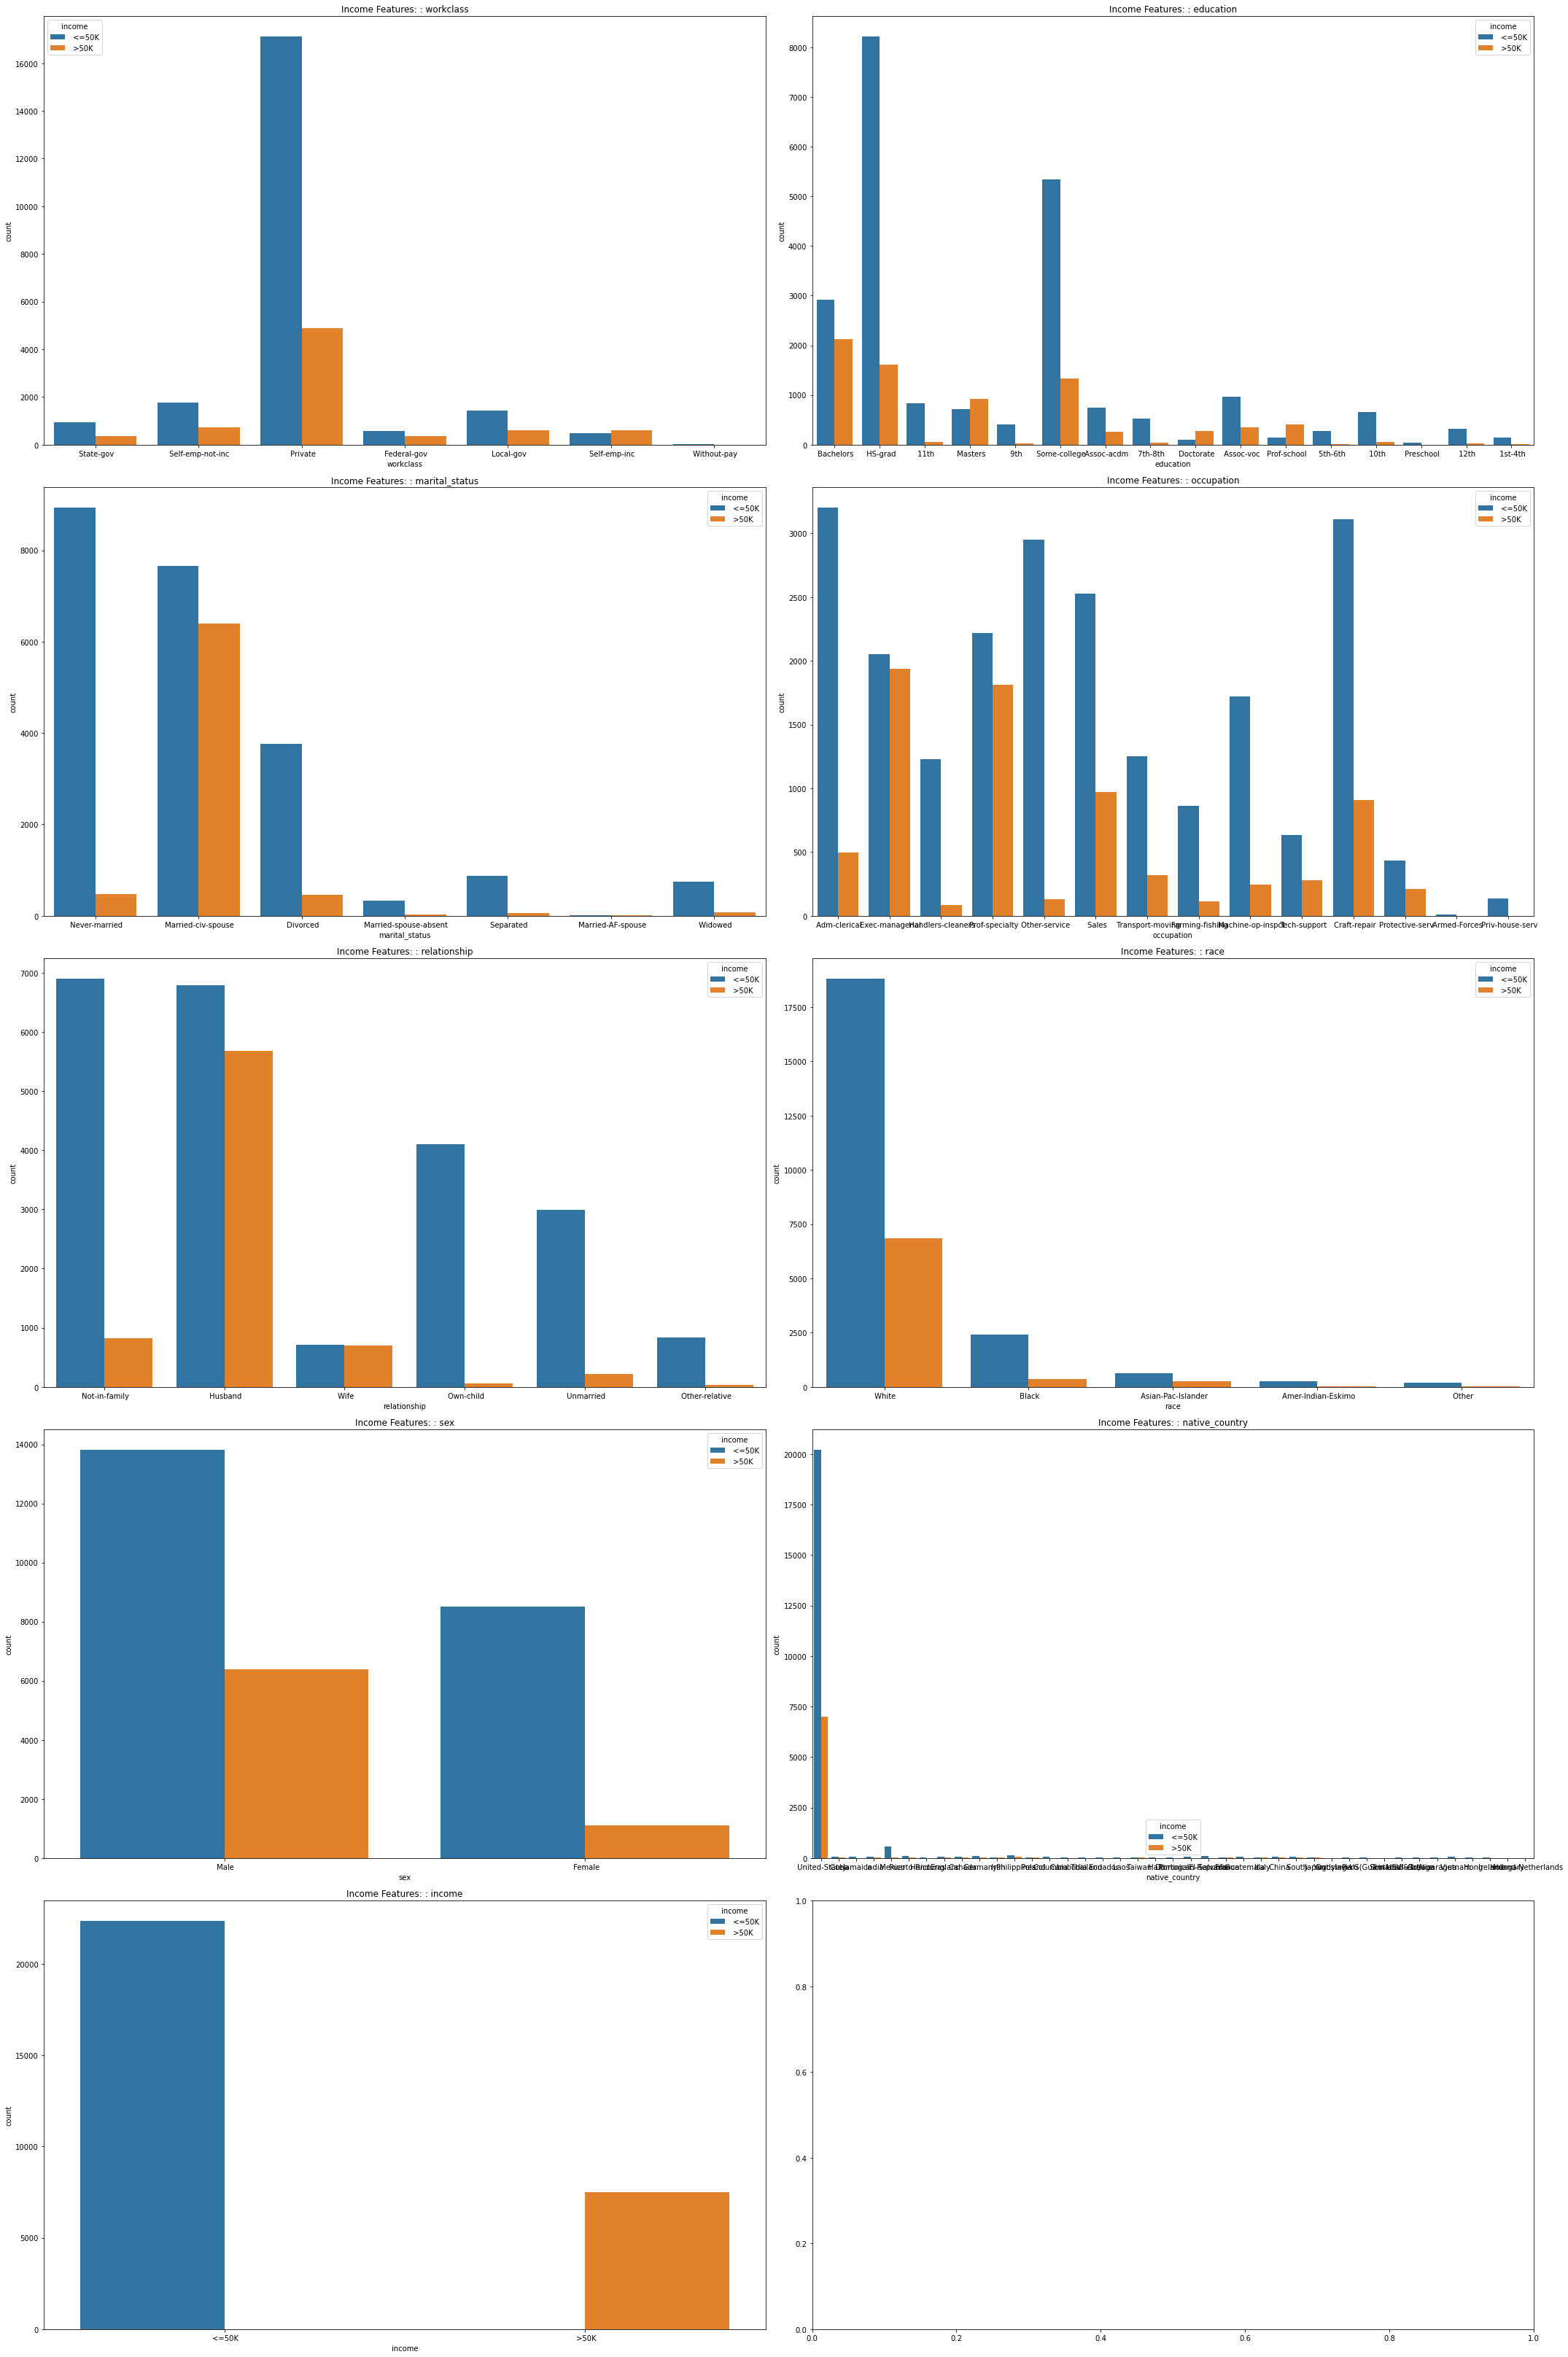

In [19]:
plot_categoricals(category_features.columns.to_list(), 'Income Features: ')

### 3. Data Preprocessing
In this section, the followings will be done:
- Feature Scaling
- Encoding

#### Feature Scaling

Among all features, we have three numerical features: tenure, MonthlyCharges, TotalCharges. From the boxplots shown above, as they have vast difference in range of values, we will adopt min-max scaler to limit their range from 0 to 1

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

<ipython-input-21-fc77d4ec1c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_features] = scaler.fit_transform(df[num_features])
C:\Users\toddp\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [22]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.291667,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.444444,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.277778,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.486111,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.138889,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,0.125000,Private,0.165563,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
29830,0.305556,Private,0.095589,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
29831,0.555556,Private,0.093914,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
29832,0.055556,Private,0.127620,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


#### Encoding

- Columns = two labels: 1, 0
- Columns > two labels: One hot encoding


P.S. An alternative attempt:
- Columns = two labels: 1, 0
- Columns > two labels without inherit order: One hot encoding
- Columns > two labels with inherit order: Ordinal encoding (e.g. education)

In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [24]:
df['sex'] = df['sex'].replace({' Male':1,' Female':0})
df['income'] = df['income'].replace({' >50K':1,' <=50K':0})

<ipython-input-24-6d20cc43a5c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace({' Male':1,' Female':0})
<ipython-input-24-6d20cc43a5c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].replace({' >50K':1,' <=50K':0})


In [25]:
df['income'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [26]:
df['sex'].value_counts().index

Int64Index([1, 0], dtype='int64')

In [27]:
one_hot_encoded_features = [
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'native_country'
]

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(drop='first')
encoded_df =onehotencoder.fit_transform(df[one_hot_encoded_features]).toarray()

In [29]:
encoded_df

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [30]:
# Dataframe of those feature who did one hot encoding
encoded_df = pd.DataFrame(encoded_df, columns=onehotencoder.get_feature_names(one_hot_encoded_features))
encoded_df

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29830,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29831,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29832,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# Merging the dataframe together
df = pd.concat([df,encoded_df],axis=1)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.291667,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.444444,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.277778,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.486111,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.138889,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,0.125000,Private,0.165563,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29830,0.305556,Private,0.095589,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29831,0.555556,Private,0.093914,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29832,0.055556,Private,0.127620,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df.isnull().sum()

age                                0
workclass                          0
fnlwgt                             0
education                          0
education_num                      0
                                  ..
native_country_ Thailand           0
native_country_ Trinadad&Tobago    0
native_country_ United-States      0
native_country_ Vietnam            0
native_country_ Yugoslavia         0
Length: 104, dtype: int64

In [33]:
df2 = df.drop(one_hot_encoded_features,axis=1)
df2

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.291667,0.043338,0.800000,1,0.021740,0.0,0.397959,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.444444,0.047277,0.800000,1,0.000000,0.0,0.122449,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.277778,0.137244,0.533333,1,0.000000,0.0,0.397959,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.486111,0.150212,0.400000,1,0.000000,0.0,0.397959,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.138889,0.220703,0.800000,0,0.000000,0.0,0.397959,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,0.125000,0.165563,0.733333,0,0.000000,0.0,0.377551,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29830,0.305556,0.095589,0.533333,1,0.000000,0.0,0.397959,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29831,0.555556,0.093914,0.533333,0,0.000000,0.0,0.397959,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29832,0.055556,0.127620,0.533333,1,0.000000,0.0,0.193878,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
df2.to_csv('processed.csv')